# SARP-East Coding Lesson 8 - Visualization
18 July 2024
<br>Riley McCue

## 💭🧠 *"If I can't picture it, I can't understand it."* 🧠💭
<br>-Albert Einstein

## 🧐 *"The purpose of visualization is insight, not pictures.'* 🧐
<br>-Ben Schneiderman (UMD)

## 💶 *"A picture is worth 1000 words."* 💶
<br>-everybody

[OFFICE HOUR SIGNUP](https://docs.google.com/spreadsheets/d/1EDDZ7jxGzhFhAQeKTjtLBmbVYn3H6v1zb6QHUAIKUjA/edit?usp=sharing)

## 🌏 Let's Open our Data
We will be using our buoy data from our last lesson.
<br> --> Note: If you did the Datetimes Lesson, you have this downloaded already. The file name is `FL_OCEAN_2019.csv`.

[Buoy data!](https://buoybay.noaa.gov/data/data-download) ⛵
<br> Select the following:
1. Station: First Landing (FL)
2. Year: 2019
3. Type: Ocean
<br> --> Get URL for download
<br> You will likley have to enable pop-up browsers.

You know the drill by now:
1. Download your data into the cloud
2. Enter your filepath in below

This is **tabular** data, so we will be using `pandas`.

In [1]:
#Import pandas library
import pandas as pd
#Imports datetime library
import datetime as dt

In [2]:
#Opens data
df = pd.read_csv('./Data_Images/FL_OCEAN_2019.csv')

#I'm cleaning up the data a bit...

#Drops first and second row of string labels
df = df.drop([0,1])
#Drops columns with QC (they are just unecessary).
df = df.drop(['Temperature QC','Salinity QC', 'Chlorophyll QC', 'Turbidity QC', 'Oxygen QC', 'Waves QC', 'Latitude', 'Longitude'], axis=1)
#Saves data values as floats rather than strings
l_cols = df.columns.drop('Time (UTC)')
df[l_cols] = df[l_cols].astype(float)

#Converts our 'Time (UTC)' column to datetimes and indexes this column.
df['Time (UTC)'] = pd.to_datetime(df['Time (UTC)'], format = '%d-%b-%y %X')
index = df['Time (UTC)']
df = df.set_index(index)

#Resamples our data to daily rather than hourly points
        #This is just for more visual clarity with plotting throughout this lesson
df = df[l_cols].resample('1D').mean()

#Recreates a Time column from our new datetime indicies
df['Time (UTC)'] = df.index

In [3]:
#Let's view our data
df

,Temperature,Salinity,Chlorophyll,Turbidity,Oxygen,Significant wave height,Wave from direction,Wave period,North surface currents,East surface currents,Time (UTC)
Time (UTC),,,,,,,,,,,
2019-01-01,8.963333,13.805417,8.007500,1.371667,11.721250,0.482083,167.558333,3.041667,66.333333,162.186250,2019-01-01
2019-01-02,8.545217,14.046087,8.550435,1.380435,11.746087,0.420870,63.982609,2.939130,-22.923478,103.558261,2019-01-02
2019-01-03,8.695833,13.822917,7.342917,1.315833,11.597500,0.317917,94.333333,3.687500,78.996250,-19.854583,2019-01-03
2019-01-04,8.579583,13.584583,7.273333,1.180000,11.760833,0.223750,92.708333,3.512500,18.900833,28.077083,2019-01-04
2019-01-05,9.007917,14.274167,5.556250,1.277083,11.182500,0.525417,179.354167,2.970833,85.841250,158.544583,2019-01-05
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,7.821250,24.416667,9.893333,2.702083,10.085833,0.432500,72.191667,3.387500,-0.373333,102.325417,2019-12-24
2019-12-25,8.243333,26.405833,9.300417,3.570417,9.723333,0.680833,63.433333,3.725000,21.682500,74.406250,2019-12-25
2019-12-26,7.851667,24.173333,8.809583,2.624583,10.140417,0.440417,92.454167,4.937500,-10.755417,120.997500,2019-12-26


<Axes: xlabel='Time (UTC)'>

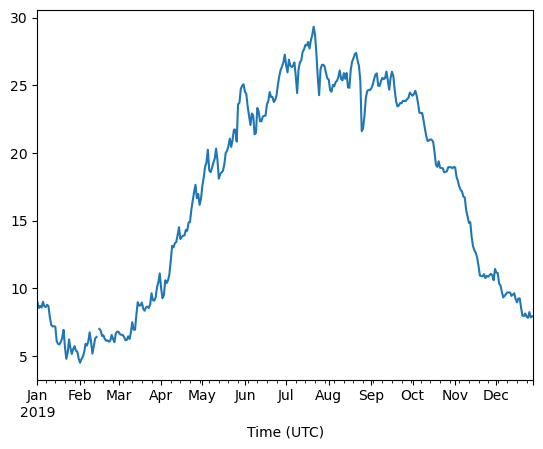

In [4]:
#Let's try this .plot() function to view our temperature
df['Temperature'].plot()

<Axes: xlabel='Time (UTC)', ylabel='Temperature'>

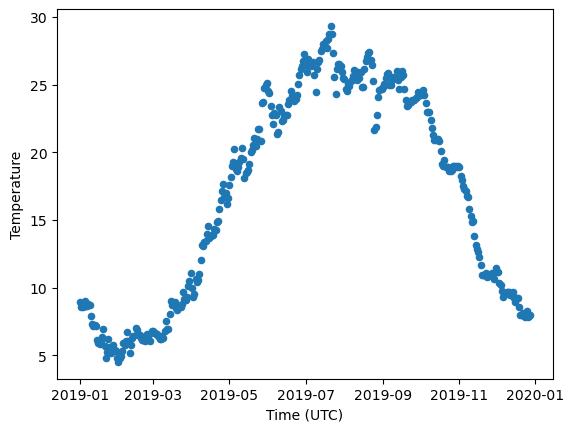

In [5]:
#Let's also make a scatter plots using pandas plotting functions
df.plot.scatter(x = 'Time (UTC)', y='Temperature')

This is some visualization we can do quickly with the built in visualizing functions in pandas. It is not fancy, but it can help us easily get a sense of our new data.

A major aspect of working with and analyzing our data is in visualization. Today, we will primarily be talking about a library in Python called `matplotlib`.

# 🎨👩🏾‍🎨 Visualization -- A Scientist's Canvas 👩🏾‍🎨🎨
We, as scientific researchers, all have immense creative ability, and one scientific creative outlet we have is data visualization. This is one of the MORE FUN parts of research!!!

There are many libraries and functions you can use to plot in Python, and many are based off of `matplotlib`. 

![VISUAL](./Data_Images/ease_vs_complexity.jpg)

`matplotlib` gives us lots of control over certain aspects of our plot, but with that, it is more complex. 

:::{admonition} More Python Plotting Libraries
:class: hint
An [ARTICLE](https://www.askpython.com/python/python-plotting-and-graph-libraries) discussing uses of the 5 most common plotting libraries in Python. 

Let's look at a LEGO analogy:

![image 1](./Data_Images/building_on_libraries-legos.jpg)
![image 2](./Data_Images/building_on_libraries-python.jpg)

You all will soon approach a time in your projects where you will want to go beyond the powers of just `.plot()`. I am going to cover the basics here, but for more in-depth questions and examples, check out [THIS matplotlib tutorial](https://matplotlib.org/stable/tutorials/pyplot.html).

## 🎨**Now to `matplotlib`**

To begin, let's import our NEW library!

In [6]:
#Import our matplotlib library
import matplotlib.pyplot as plt

...and let's dive into some concepts first.

### 🛍️ **Concept 1** Each Part of a Graph is a Separate *Object*
Plots in Matplotlib or organized as a collection of overlapping objects.  Each object can be created independently accessed, although it doesn't have to be.

A few of the most important objects to start with are **figure**, **axes** and **axis**.

<img src="https://files.realpython.com/media/fig_map.bc8c7cabd823.png">

#### Setting a Figure and Axes

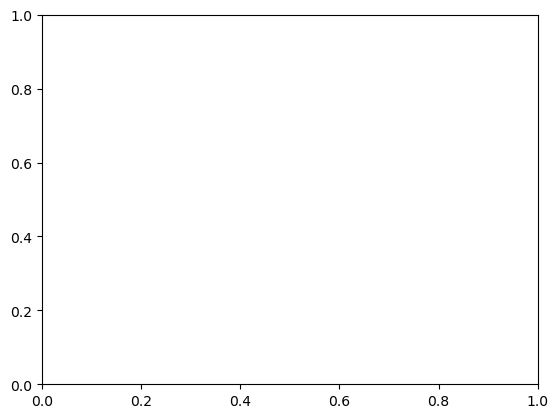

In [7]:
#Creates a figure
fig1 = plt.figure()

#Creates a set of axes
ax1 = plt.axes()

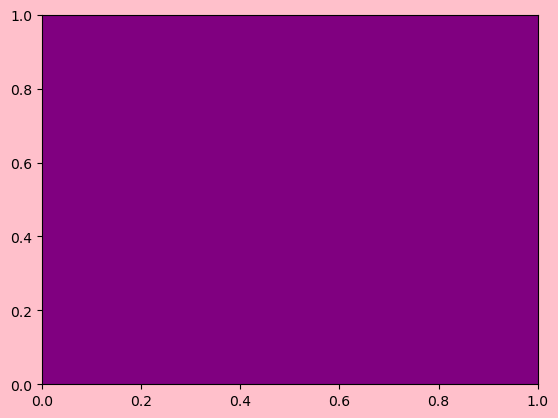

In [8]:
#Let's change the colors of these now
fig1 = plt.figure().set_facecolor('pink')
ax1 = plt.axes().set_facecolor('purple')

## 📚**Concept 2** Objects are *Stacked*

Each time you add a new object to a matplotlib figure, it gets layered on top of the current plot. Objects are added in the order they are created. 

Think of painting --> You paint something, and you let it dry. If you choose to add more to the painting later, you can only paint on top of what is already there. 

Let's look at a simple example with 2 dots:

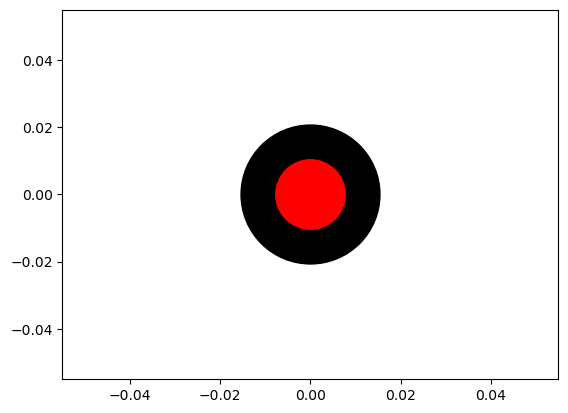

In [9]:
#Creates a black dot
plt.plot([0], [0], color='black', marker='o', markersize=100)
#Creates a smaller red dot in the same location
plt.plot([0], [0], color='red', marker = 'o', markersize=50)

Now let's create these objects in the opposite order.

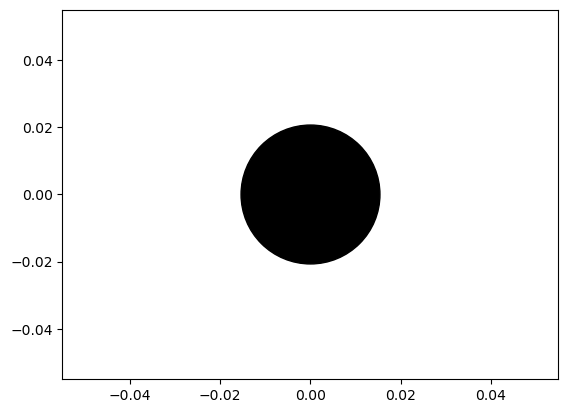

In [10]:
#Creates a small red dot
plt.plot([0], [0], color='red', marker = 'o', markersize=50)
#Creates a larger black dot in the same location
plt.plot([0], [0], color='black', marker='o', markersize=100)

In the second figure, we cannot see the red dot because it was created before the black dot. The black dot is layered over the top. The red dot still exist underneath, but we cannot see it because of the order in which we created our objects.

:::{admonition} 🦁More on Rendering Order
:class: hint
As with most things in science, there are always exceptions. There are some slight caveats to what we went over here. To read more about the technicality of layering, checkout the [zorder matplotlib demo](https://matplotlib.org/stable/gallery/misc/zorder_demo.html).

# 👩🏾‍💻 Application Interfaces (API) in `matplotlib`
An application interface is a set of protocols that enable different components to communicate. <br>In `matplotlib`, we actually have 2 options for this:
1. *Implicit pyplot interface* - uses `plt.plot()` to change the plot.
<br>--> This is often less code and easier to approach.
2. *Explicit axes (object-oriented) interface* - changes are made by manipulating the figure and axes directly with `fig` and `ax`.
<br> --> This is often more code, more complex, but gives you more artistic freedom!

:::{admonition} More on APIs
:class: hint
For more information on the difference between APIs, check out [this website](https://matplotlib.org/stable/users/explain/figure/api_interfaces.html#api-interfaces).

## 🛖 **Method 1** The `pyplot` API

The `plt.plot()` method is a one-line command to make a plot.
<br>The format is:
```
plt.plot(x, y)
```
Where `x` and `y` are arrays of data that you want on each the `x`(horizontal) and `y`(vertical).

### 🌏To our Real Data
We already have our data opened, let's view it again.

In [11]:
df

,Temperature,Salinity,Chlorophyll,Turbidity,Oxygen,Significant wave height,Wave from direction,Wave period,North surface currents,East surface currents,Time (UTC)
Time (UTC),,,,,,,,,,,
2019-01-01,8.963333,13.805417,8.007500,1.371667,11.721250,0.482083,167.558333,3.041667,66.333333,162.186250,2019-01-01
2019-01-02,8.545217,14.046087,8.550435,1.380435,11.746087,0.420870,63.982609,2.939130,-22.923478,103.558261,2019-01-02
2019-01-03,8.695833,13.822917,7.342917,1.315833,11.597500,0.317917,94.333333,3.687500,78.996250,-19.854583,2019-01-03
2019-01-04,8.579583,13.584583,7.273333,1.180000,11.760833,0.223750,92.708333,3.512500,18.900833,28.077083,2019-01-04
2019-01-05,9.007917,14.274167,5.556250,1.277083,11.182500,0.525417,179.354167,2.970833,85.841250,158.544583,2019-01-05
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,7.821250,24.416667,9.893333,2.702083,10.085833,0.432500,72.191667,3.387500,-0.373333,102.325417,2019-12-24
2019-12-25,8.243333,26.405833,9.300417,3.570417,9.723333,0.680833,63.433333,3.725000,21.682500,74.406250,2019-12-25
2019-12-26,7.851667,24.173333,8.809583,2.624583,10.140417,0.440417,92.454167,4.937500,-10.755417,120.997500,2019-12-26


We are going to use the `pyplot` method to create some figures. Let try to build off of our time series of temperature we viewed earlier with pandas tools, but this time, with `matplotlib`.

In [12]:
# STEP 1 - Organize data

#Let's name our x and y data we want to plot
x = df['Time (UTC)']
y = df['Temperature']

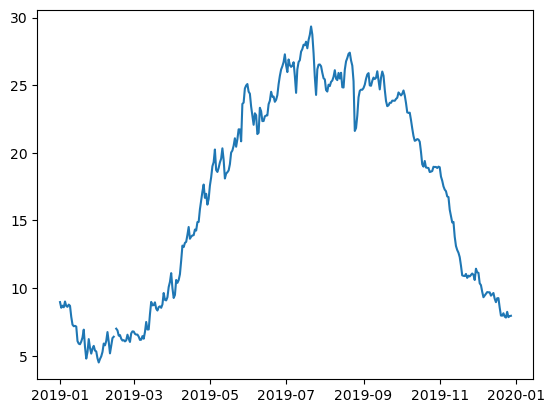

In [13]:
# STEP 2 - Make our Graph
plt.plot(x, y)

Even though we didn’t explicitly create a figure, axes, axis, line, axis labels, or tick marks they were all created together with `plt.plot()`. If we want to change something about any of those elements or add elements that don’t exist right now we do that by using *methods* on the plt object.

:::{admonition} More on `pyplot` Method
:class: hint
Check out the [pyplot documentation](https://matplotlib.org/stable/api/pyplot_summary.html) to learn more!

Let's add some labels and narrow in our plot a little more.

Text(0, 0.5, 'Temperature')

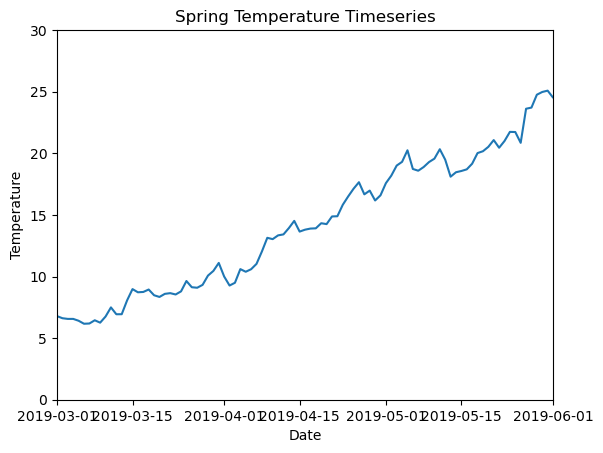

In [14]:
#Creates the plot from the given data
plt.plot(x, y)

# Sets the x axis scale -- Looking only at spring months
plt.xlim(dt.date(2019, 3, 1), dt.date(2019, 6, 1))

# Sets the y axis scale
plt.ylim(0,30)

# Adds a title for the plot
plt.title('Spring Temperature Timeseries')  # adding a title

# Adds an x-axis label
plt.xlabel('Date')

# Adds a y-axis label
plt.ylabel('Temperature')  # adding a label on the y axis

We just explored some methods like `.xlim()` and `.ylim()`, `.title()`, and `.xlabel()` and `.ylabel()`. 

We can explore a few more below:

In [15]:
# Changes the size of the figure
plt.rcParams["figure.figsize"] = (15,3) 

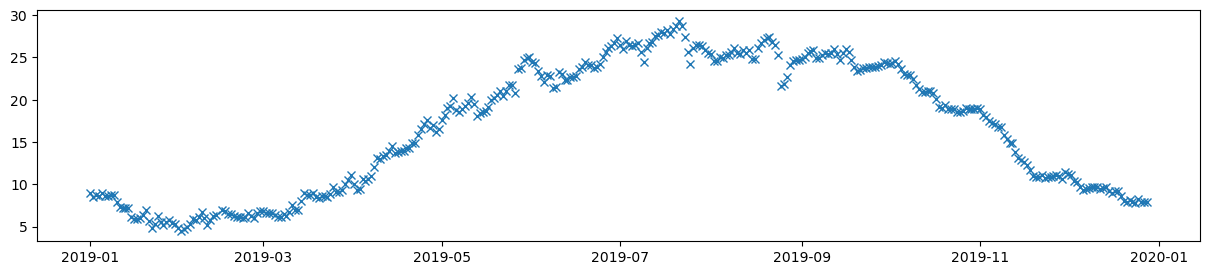

In [16]:
# Changes our marker to an x
plt.plot(x, y, 'x')

<BarContainer object of 362 artists>

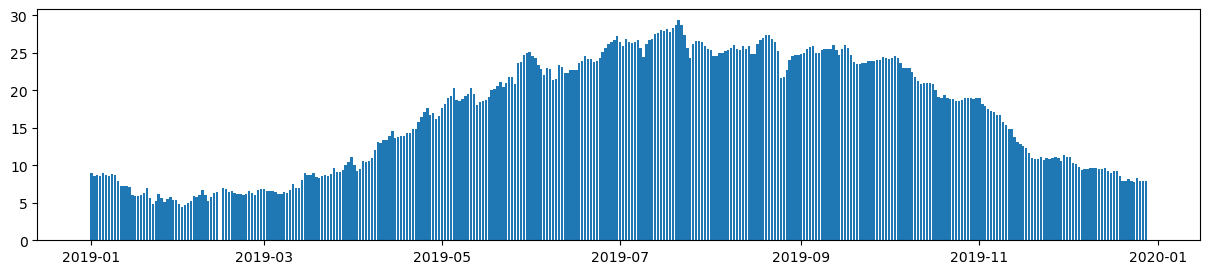

In [17]:
# Creates a bar plot rather than a typical line plot
plt.bar(x,y)

There are countless methods to manipulate plots.

:::{admonition} More Examples for `pyplot`
:class: hint
Scroll to the bottom of [this page](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) for some sick examples using `pyplot`!
:::

:::{admonition} Examples of `pyplot` subplots
:class: hint
Scroll to the bottom of [this page](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html) for examples!

## 🏘️ **Method 2** Object-Oriented API
This method is more complex, with broader functionality.

The biggest difference is that, in order to do anything with our `fig` or `ax`, we need to use the command to create the figures and axes objects.

It is important to keep track of the class of our objects. 
:::{admonition} Tip for Object-Oriented Plotting
:class: note
Use `.__class__` to check the classification of your objects. This is similar to the `type()` function we have been using.

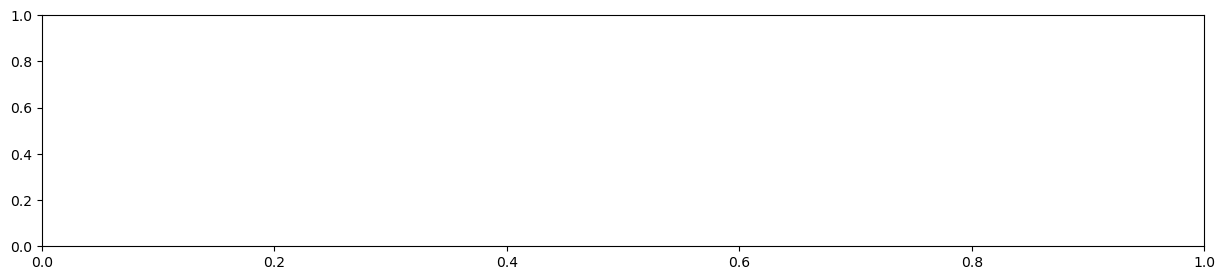

In [18]:
#Let's create our figure and axes
fig, ax  = plt.subplots()

In [19]:
# View the class of our figure and axes
print(fig.__class__)
print(ax.__class__)

<class 'matplotlib.figure.Figure'>
<class 'matplotlib.axes._axes.Axes'>


hi is a  <class 'matplotlib.figure.Figure'>
bye is a  <class 'matplotlib.axes._axes.Axes'>


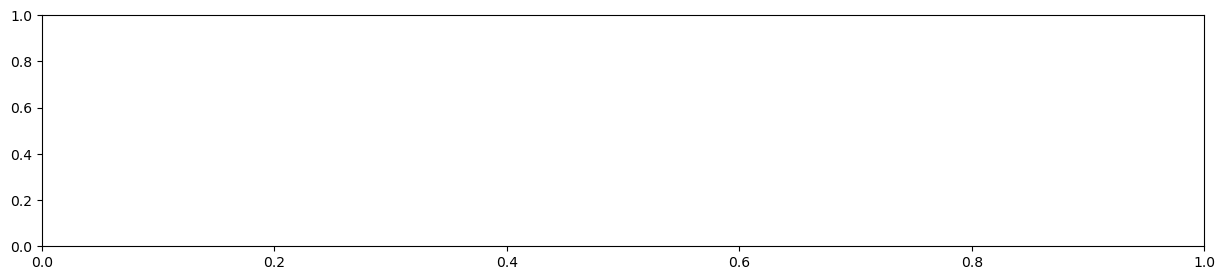

In [20]:
# NOTE -- You can name your figure and axes ANYTHING you want, they are just variable names
hi, bye = plt.subplots()
print('hi is a ', hi.__class__)
print('bye is a ', bye.__class__)

#### 🌏 To our Real Data
Let's view the same data we have been working with.

Text(0.5, 1.0, 'Temperature')

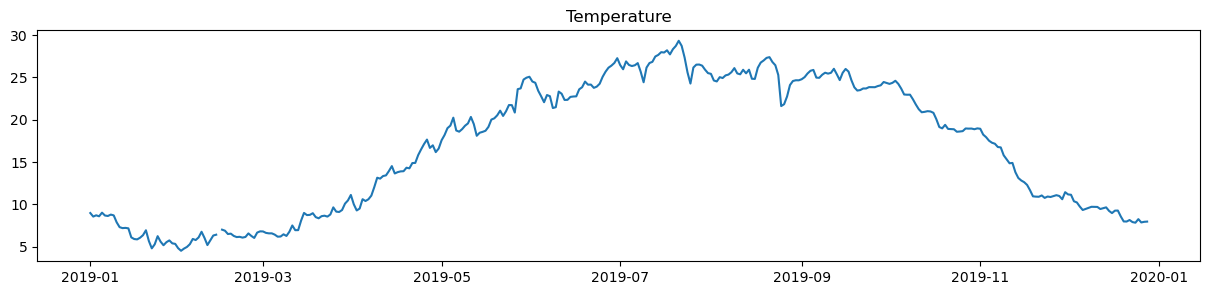

In [21]:
#Open up our figure
fig, ax = plt.subplots()

#Give our axes data to plot -- Note we use ax.plot() instead of plt.plot()
ax.plot(x, y) 

#Gives our axes a title
ax.set_title('Temperature')

And we seemed to have arrived at the same spot as we have in our two previous methods. So why go through the extra work for this????

Text(0.5, 1.0, 'Line Plot of Temperature Time Series')

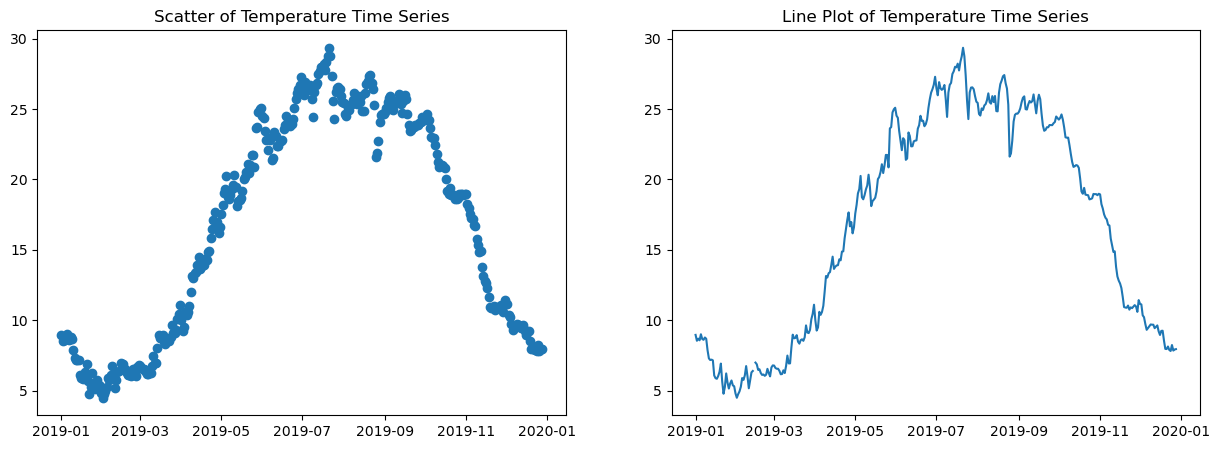

In [22]:
#Creates one figure with two subplots with different axes
fig, (ax1, ax2) = plt.subplots(1, 2)

#Sets size of the figure
fig.set_size_inches(15, 5)

#Creates plot from data for the first subplot
ax1.scatter(x, y)
ax1.set_title('Scatter of Temperature Time Series')

#Creates plot from data for the second subplot
ax2.plot(x, y)
ax2.set_title('Line Plot of Temperature Time Series')

It may be more work to do the basic plot, but you are able to add much more past the basics. 

:::{admonition} 3D Plots
:class: hint
Check out [this page](https://matplotlib.org/stable/api/toolkits/mplot3d.html) for how to make 3-dimensional plots using matplotlib object-oriented approach!

:::{admonition} More! and More! and More!
:class: hint
Scroll through the topics on the left hand side of [THIS WEBSITE](https://matplotlib.org/stable/api/matplotlib_configuration_api.html) to browse all the capablities of matplotlib.

## 🇬 Googling
Google will be your friend with this. Knowing what words to use in google is important, so here is a breakdown of some common verbage to use when referring to different parts of the plot.

<img src='https://files.realpython.com/media/anatomy.7d033ebbfbc8.png'>

# 😟😿 Which Approach do I take?!?!?!
* For getting a general sense of your data after you've opened it, use the trusty `.plot()`
After you have your data and analysis:
1. Google an example of the type of plot you are trying to make, and follow that method.
2. Start with `pyplot` since it is simpler, and switch to object-oriented if necessary.
   <br>--> Switching methods may cause more work.
4. Start with object-oriented so you never have to change methods
   <br>--> If you only need simple plots, you may do more work than necessary (but practice is always good!)

# Static vs Interactive Visualization
:::{admonition} Interactive Visualization
:class: note
`matplotlib` is mainly for static visualization.Everything I walked you through today is for *static* visualization, meaning you give your computer data to create an output that is a single image. You might choose to make many images and flash them together to simulate movement, but ultimately, each graph is static itself.

Some of you may want to explore interactive visualization, which are visuals in which you can click and move around in the output. If you are interested in this, check out this introduction to the [bokeh library](https://www.geeksforgeeks.org/python-bokeh-tutorial-interactive-data-visualization-with-bokeh/).


# 🏁 Wrap-up
I did not provide you all any practice problems because you all have data to practice with! If you are struggling applying these concepts to your project data, experiment with the pandas Dataframe we used in this lesson to help solidify the concepts!